In [ ]:
# required libraries
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load datasets

In [2]:
start = "2015-12-31 00:00:00"
end = "2019-12-31 23:30:00"

## 1.1. Electricity demand dataset

In [3]:
# 1. electricty demand data
demand = pd.read_csv("./Shared/totaldemand_nsw.csv/totaldemand_nsw.csv")
print(demand.head())
print(demand.tail())
print(demand.dtypes)
print("Number of duplicate rows:", demand.duplicated().sum()) #Check number of duplicate rows

        DATETIME  TOTALDEMAND REGIONID
0  1/1/2010 0:00      8038.00     NSW1
1  1/1/2010 0:30      7809.31     NSW1
2  1/1/2010 1:00      7483.69     NSW1
3  1/1/2010 1:30      7117.23     NSW1
4  1/1/2010 2:00      6812.03     NSW1
               DATETIME  TOTALDEMAND REGIONID
196508  17/3/2021 22:00      7419.77     NSW1
196509  17/3/2021 22:30      7417.91     NSW1
196510  17/3/2021 23:00      7287.32     NSW1
196511  17/3/2021 23:30      7172.39     NSW1
196512   18/3/2021 0:00      7094.51     NSW1
DATETIME        object
TOTALDEMAND    float64
REGIONID        object
dtype: object
Number of duplicate rows: 0


In [4]:
# Convert DATETIME column to datetime format
demand["DATETIME"] = pd.to_datetime(demand["DATETIME"], dayfirst=True)
print(demand.head())


             DATETIME  TOTALDEMAND REGIONID
0 2010-01-01 00:00:00      8038.00     NSW1
1 2010-01-01 00:30:00      7809.31     NSW1
2 2010-01-01 01:00:00      7483.69     NSW1
3 2010-01-01 01:30:00      7117.23     NSW1
4 2010-01-01 02:00:00      6812.03     NSW1


In [5]:
demand = demand[(demand["DATETIME"] >= start) & (demand["DATETIME"] <= end)]
demand['DATE'] = demand['DATETIME'].dt.date
demand = demand.drop(["REGIONID"], axis=1)
print(demand.head())
print(demand.shape)

                  DATETIME  TOTALDEMAND        DATE
105120 2015-12-31 00:00:00      6935.27  2015-12-31
105121 2015-12-31 00:30:00      6766.91  2015-12-31
105122 2015-12-31 01:00:00      6548.14  2015-12-31
105123 2015-12-31 01:30:00      6237.02  2015-12-31
105124 2015-12-31 02:00:00      5974.53  2015-12-31
(70176, 3)


In [6]:
print("No. of dates (long format) in electricity demand data:", demand["DATETIME"].nunique())
print("Unique dates in electricity demand data:", demand["DATE"].nunique())

No. of dates (long format) in electricity demand data: 70176
Unique dates in electricity demand data: 1462


## 1.2. Temperature dataset

In [7]:
# Temperature data
temp = pd.read_csv("./Shared/temperature_nsw.csv/temperature_nsw.csv")
print(temp.head())
print(temp.tail())
print(temp.dtypes)

    LOCATION       DATETIME  TEMPERATURE
0  Bankstown  1/1/2010 0:00         23.1
1  Bankstown  1/1/2010 0:01         23.1
2  Bankstown  1/1/2010 0:30         22.9
3  Bankstown  1/1/2010 0:50         22.7
4  Bankstown  1/1/2010 1:00         22.6
         LOCATION         DATETIME  TEMPERATURE
220321  Bankstown  17/3/2021 23:00         19.1
220322  Bankstown  17/3/2021 23:20         19.0
220323  Bankstown  17/3/2021 23:30         18.8
220324  Bankstown  17/3/2021 23:34         18.8
220325  Bankstown   18/3/2021 0:00         18.6
LOCATION        object
DATETIME        object
TEMPERATURE    float64
dtype: object


In [8]:
#Check number of duplicate rows
print("Number of duplicate rows:", temp.duplicated().sum())

temp = temp.drop_duplicates().reset_index(drop=True)
print("Temperature data after removing duplicates:", temp.shape)

Number of duplicate rows: 13
Temperature data after removing duplicates: (220313, 3)


In [9]:
#Data between 2016-01-01 and 2019-12-31
temp["DATETIME"] = pd.to_datetime(temp["DATETIME"], dayfirst=True)
print(temp.head(10))
print(temp.shape)

    LOCATION            DATETIME  TEMPERATURE
0  Bankstown 2010-01-01 00:00:00         23.1
1  Bankstown 2010-01-01 00:01:00         23.1
2  Bankstown 2010-01-01 00:30:00         22.9
3  Bankstown 2010-01-01 00:50:00         22.7
4  Bankstown 2010-01-01 01:00:00         22.6
5  Bankstown 2010-01-01 01:30:00         22.5
6  Bankstown 2010-01-01 02:00:00         22.5
7  Bankstown 2010-01-01 02:30:00         22.4
8  Bankstown 2010-01-01 03:00:00         22.3
9  Bankstown 2010-01-01 03:30:00         22.3
(220313, 3)


In [10]:
#Data between 2016-01-01 and 2019-12-31
temp["DATETIME"] = pd.to_datetime(temp["DATETIME"], dayfirst=True)
temp['DATE'] = temp['DATETIME'].dt.date
temp = temp[(temp["DATETIME"] >= start) & (temp["DATETIME"] <= end)]
print(temp.head(10))
print(temp.shape)

         LOCATION            DATETIME  TEMPERATURE        DATE
117642  Bankstown 2015-12-31 00:00:00         16.3  2015-12-31
117643  Bankstown 2015-12-31 00:30:00         16.3  2015-12-31
117644  Bankstown 2015-12-31 01:00:00         16.2  2015-12-31
117645  Bankstown 2015-12-31 01:30:00         15.9  2015-12-31
117646  Bankstown 2015-12-31 02:00:00         15.3  2015-12-31
117647  Bankstown 2015-12-31 02:30:00         15.3  2015-12-31
117648  Bankstown 2015-12-31 03:00:00         15.5  2015-12-31
117649  Bankstown 2015-12-31 03:30:00         14.8  2015-12-31
117650  Bankstown 2015-12-31 04:00:00         14.7  2015-12-31
117651  Bankstown 2015-12-31 04:30:00         14.3  2015-12-31
(78575, 4)


In [11]:
# Check rows with missing temperature after merge
na_temp = temp[temp["TEMPERATURE"].isna()]
print("Number of missing temperature rows:", na_temp.shape[0])

Number of missing temperature rows: 0


In [12]:
# Merge on DATETIME
merged = pd.merge(demand, temp[["DATETIME", "TEMPERATURE"]], on="DATETIME", how="left")
print("Shape after merge:", merged.shape)
print(merged.head())
print("No. of dates (long format) in merged data:", merged["DATETIME"].nunique())
print("Unique dates in merged data:", merged["DATE"].nunique())

Shape after merge: (70176, 4)
             DATETIME  TOTALDEMAND        DATE  TEMPERATURE
0 2015-12-31 00:00:00      6935.27  2015-12-31         16.3
1 2015-12-31 00:30:00      6766.91  2015-12-31         16.3
2 2015-12-31 01:00:00      6548.14  2015-12-31         16.2
3 2015-12-31 01:30:00      6237.02  2015-12-31         15.9
4 2015-12-31 02:00:00      5974.53  2015-12-31         15.3
No. of dates (long format) in merged data: 70176
Unique dates in merged data: 1462


In [13]:
# Check rows with missing temperature after merge
missing_temp = merged[merged["TEMPERATURE"].isna()]

print("Number of missing temperature rows:", missing_temp.shape[0])
print("First few missing rows:")
print(missing_temp.head())

Number of missing temperature rows: 250
First few missing rows:
               DATETIME  TOTALDEMAND        DATE  TEMPERATURE
397 2016-01-08 06:30:00      7074.54  2016-01-08          NaN
398 2016-01-08 07:00:00      7318.20  2016-01-08          NaN
399 2016-01-08 07:30:00      7522.06  2016-01-08          NaN
400 2016-01-08 08:00:00      7703.92  2016-01-08          NaN
405 2016-01-08 10:30:00      7910.10  2016-01-08          NaN


In [14]:
temp.loc[temp["DATETIME"] == "2016-01-08 06:30:00", ]

,LOCATION,DATETIME,TEMPERATURE,DATE


In [15]:
#Fill remaining missing values using time interpolation
merged = merged.set_index("DATETIME")
merged["TEMPERATURE"] = merged["TEMPERATURE"].interpolate(method="time", limit_direction="both")

# Check again if any missing remains
print("Number of missing temperature rows after fill:",
      merged["TEMPERATURE"].isna().sum())

Number of missing temperature rows after fill: 0


## 1.3. Sunlight exposure dataset

In [16]:
# 5. Sunlight exposure dataset
sun_exp = pd.read_excel("./Downloaded/sunlight_exposure.xlsx")
print(sun_exp.head())
print(sun_exp.tail())
print(sun_exp.dtypes)

sun_exp["DATE"] = pd.to_datetime(sun_exp["DATE"]) #DATETIME to datetime type
print(sun_exp.dtypes)
print(sun_exp.shape)


        DATE  sunlight_exposure
0 2016-01-01               32.3
1 2016-01-02               23.2
2 2016-01-03               12.7
3 2016-01-04                7.6
4 2016-01-05                3.9
           DATE  sunlight_exposure
1456 2019-12-27               30.7
1457 2019-12-28               30.8
1458 2019-12-29               21.8
1459 2019-12-30               26.3
1460 2019-12-31               27.7
DATE                 datetime64[ns]
sunlight_exposure           float64
dtype: object
DATE                 datetime64[ns]
sunlight_exposure           float64
dtype: object
(1461, 2)


In [17]:
print(sun_exp.isna().sum())


DATE                 0
sunlight_exposure    1
dtype: int64


In [18]:
#sun_exp['DATE'] = sun_exp['DATE'].dt.date
sun_exp = sun_exp.set_index("DATE")
# Interpolate using time-based method
sun_exp["sunlight_exposure"] = sun_exp["sunlight_exposure"].interpolate(method="time", limit_direction="both")

# Check again if any missing remains
print("Number of missing sunlight exposure rows after fill:",
      sun_exp["sunlight_exposure"].isna().sum())

Number of missing sunlight exposure rows after fill: 0


## 1.4. Precipitation dataset

In [19]:
# Precipitation dataset
precip = pd.read_csv("./Downloaded/g4.areaAvgTimeSeries.GPCPDAY_3_3_precip.20160101-20191231.141E_37S_153E_28S.csv")
print(precip.head())
print(precip.tail())
print(precip.dtypes)

# some data cleaning
precip = precip.rename(columns={'time': "DATE",
                                ' mean_GPCPDAY_3_3_precip': "precipitation"}) 
precip["DATE"] = pd.to_datetime(precip["DATE"], format="%m/%d/%Y") #convert DATETIME to datetime type
print(precip.head())
print(precip.tail())
print(precip.dtypes)
print(precip.shape)


       time   mean_GPCPDAY_3_3_precip
0  1/1/2016                  2.140095
1  1/2/2016                  6.496326
2  1/3/2016                  8.562486
3  1/4/2016                  4.082204
4  1/5/2016                  9.977372
            time   mean_GPCPDAY_3_3_precip
1456  12/27/2019                  0.081469
1457  12/28/2019                  0.571150
1458  12/29/2019                  0.101862
1459  12/30/2019                  0.243804
1460  12/31/2019                  1.126134
time                         object
 mean_GPCPDAY_3_3_precip    float64
dtype: object
        DATE  precipitation
0 2016-01-01       2.140095
1 2016-01-02       6.496326
2 2016-01-03       8.562486
3 2016-01-04       4.082204
4 2016-01-05       9.977372
           DATE  precipitation
1456 2019-12-27       0.081469
1457 2019-12-28       0.571150
1458 2019-12-29       0.101862
1459 2019-12-30       0.243804
1460 2019-12-31       1.126134
DATE             datetime64[ns]
precipitation           float64
dtype: obj

## 1.5. Forecasted demand dataset

In [98]:
# Forecasted demand
forecast= pd.read_csv("./Shared/forecastdemand_nsw/forecastdemand_nsw.csv")
print(forecast.head())
print(forecast.tail())
print(forecast.dtypes)

# Crop forecast data as well (2016-2019)
forecast["DATETIME"] = pd.to_datetime(forecast["DATETIME"])
forecast = forecast[(forecast["DATETIME"] >= "2016-01-01 00:00:00") & (forecast["DATETIME"] <= end)]

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2009123018     NSW1        71         7832.04  2009-12-30 12:31:49   
1        2009123019     NSW1        70         7832.04  2009-12-30 13:01:43   
2        2009123020     NSW1        69         7832.03  2009-12-30 13:31:36   
3        2009123021     NSW1        68         7832.03  2009-12-30 14:01:44   
4        2009123022     NSW1        67         7830.96  2009-12-30 14:31:35   

              DATETIME  
0  2010-01-01 00:00:00  
1  2010-01-01 00:00:00  
2  2010-01-01 00:00:00  
3  2010-01-01 00:00:00  
4  2010-01-01 00:00:00  
          PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND  \
10906014        2021031736     NSW1         5         7028.45   
10906015        2021031737     NSW1         4         7041.65   
10906016        2021031738     NSW1         3         7087.60   
10906017        2021031739     NSW1         2         7087.28   
10906018        2021031740     NSW1         1     

In [99]:
#Check number of duplicate rows
print("Number of duplicate rows:", forecast.duplicated().sum())
# removing duplicates
forecast = forecast.drop_duplicates().reset_index(drop=True)
print("forecast data after removing duplicates:", forecast.shape)

Number of duplicate rows: 142
forecast data after removing duplicates: (3891458, 6)


In [100]:
forecast['DATE'] = forecast["DATETIME"].dt.date
print(forecast.head())
print(forecast.tail())

   PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0        2015123018     NSW1        71         6747.49  2015-12-30 12:31:49   
1        2015123019     NSW1        70         6753.88  2015-12-30 13:01:46   
2        2015123020     NSW1        69         6753.85  2015-12-30 13:31:43   
3        2015123021     NSW1        68         6753.57  2015-12-30 14:01:40   
4        2015123022     NSW1        67         6753.44  2015-12-30 14:31:20   

    DATETIME        DATE  
0 2016-01-01  2016-01-01  
1 2016-01-01  2016-01-01  
2 2016-01-01  2016-01-01  
3 2016-01-01  2016-01-01  
4 2016-01-01  2016-01-01  
         PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND  \
3891453        2019123135     NSW1         5         7504.39   
3891454        2019123136     NSW1         4         7491.82   
3891455        2019123137     NSW1         3         7444.02   
3891456        2019123138     NSW1         2         7440.57   
3891457        2019123139     NSW1         

In [101]:
print("No. of dates (long format) in electricity demand data:", forecast["DATETIME"].nunique())
print("Unique dates in electricity demand data:", forecast["DATE"].nunique())

No. of dates (long format) in electricity demand data: 70128
Unique dates in electricity demand data: 1461


In [103]:
# Transforming 5-min forecasted electricity demand into daily basis
daily_forecast = forecast.groupby('DATE')['FORECASTDEMAND'].mean().reset_index().round(2)
daily_forecast = daily_forecast.rename(columns={'FORECASTDEMAND': "forecast_demand"})
daily_forecast.head()
daily_forecast.to_csv("Daily forecast.csv", index=False)

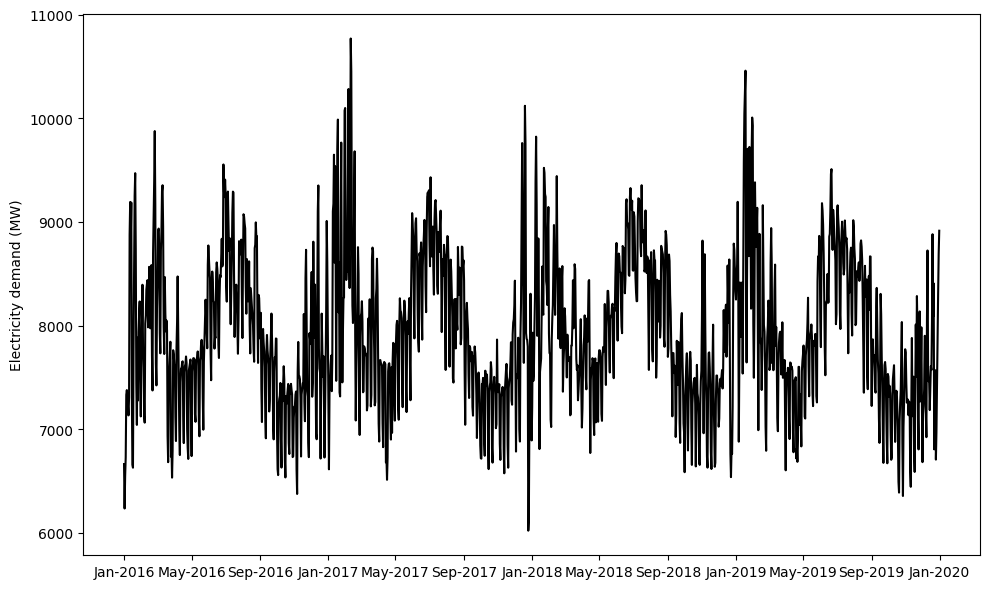

In [105]:
# Daily forecasted electricity demand plot
plt.figure(figsize=(10,6))
plt.plot(daily_forecast['DATE'], daily_forecast['forecast_demand'], color='black')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=4)) 
plt.ylabel("Electricity demand (MW)")
plt.tight_layout()


# 2. Data processing and exploration
First converting the half-hourly dataset into daily basis based on mean values (demand, temperature)

In [ ]:
# Aggregate to daily level
df0 = merged.groupby("DATE", as_index=False).agg({"TOTALDEMAND": ["mean", "min", "max"],
                                                  "TEMPERATURE": ["mean", "min", "max"]})

# MultiIndex columns
df0.columns = ["DATE", "avg_30_min_demand", "min_demand", "max_demand",
               "avg_temp", "min_temp", "max_temp"]

# Add lag features for min_demand and max_demand
df0["lag_min_demand"] = df0["min_demand"].shift(1)
df0["lag_max_demand"] = df0["max_demand"].shift(1)

df0 = df0.iloc[1:,]
df0.head()


,DATE,avg_30_min_demand,min_demand,max_demand,avg_temp,min_temp,max_temp,lag_min_demand,lag_max_demand
1,2016-01-01,6861.518333,5631.74,7913.75,20.783333,15.2,26.0,5645.67,8529.23
2,2016-01-02,6731.957292,5559.37,7390.04,20.572917,14.9,24.2,5631.74,7913.75
3,2016-01-03,6618.040000,5476.66,7328.39,21.170833,19.0,22.9,5559.37,7390.04
4,2016-01-04,7358.550000,5589.58,8313.11,20.277083,18.4,23.1,5476.66,7328.39
5,2016-01-05,7460.061875,5768.60,8338.82,18.979167,17.4,20.3,5589.58,8313.11


In [53]:
df1 = df0.drop(['min_demand', 'max_demand'], axis=1)
df1["DATE"] = pd.to_datetime(df1["DATE"])
print(df1.head())
print(df1.dtypes)

        DATE  avg_30_min_demand   avg_temp  min_temp  max_temp  \
1 2016-01-01        6861.518333  20.783333      15.2      26.0   
2 2016-01-02        6731.957292  20.572917      14.9      24.2   
3 2016-01-03        6618.040000  21.170833      19.0      22.9   
4 2016-01-04        7358.550000  20.277083      18.4      23.1   
5 2016-01-05        7460.061875  18.979167      17.4      20.3   

   lag_min_demand  lag_max_demand  
1         5645.67         8529.23  
2         5631.74         7913.75  
3         5559.37         7390.04  
4         5476.66         7328.39  
5         5589.58         8313.11  
DATE                 datetime64[ns]
avg_30_min_demand           float64
avg_temp                    float64
min_temp                    float64
max_temp                    float64
lag_min_demand              float64
lag_max_demand              float64
dtype: object


In [88]:
# Merge sunlight exposure into df1
df2 = pd.merge(df1, sun_exp["sunlight_exposure"], on="DATE", how="left")
df2 = df2.rename(columns={"sunlight_exposure": "sunlight"})
df2["DATE"] = pd.to_datetime(df2["DATE"])

print(df2.head())
print(df2.shape)
print(df2.dtypes)


        DATE  avg_30_min_demand   avg_temp  min_temp  max_temp  \
0 2016-01-01        6861.518333  20.783333      15.2      26.0   
1 2016-01-02        6731.957292  20.572917      14.9      24.2   
2 2016-01-03        6618.040000  21.170833      19.0      22.9   
3 2016-01-04        7358.550000  20.277083      18.4      23.1   
4 2016-01-05        7460.061875  18.979167      17.4      20.3   

   lag_min_demand  lag_max_demand  sunlight  
0         5645.67         8529.23      32.3  
1         5631.74         7913.75      23.2  
2         5559.37         7390.04      12.7  
3         5476.66         7328.39       7.6  
4         5589.58         8313.11       3.9  
(1461, 8)
DATE                 datetime64[ns]
avg_30_min_demand           float64
avg_temp                    float64
min_temp                    float64
max_temp                    float64
lag_min_demand              float64
lag_max_demand              float64
sunlight                    float64
dtype: object


In [89]:
df3 = pd.merge(df2, precip, on= 'DATE', how= "left")
print(df3.head())
print(df3.tail())

        DATE  avg_30_min_demand   avg_temp  min_temp  max_temp  \
0 2016-01-01        6861.518333  20.783333      15.2      26.0   
1 2016-01-02        6731.957292  20.572917      14.9      24.2   
2 2016-01-03        6618.040000  21.170833      19.0      22.9   
3 2016-01-04        7358.550000  20.277083      18.4      23.1   
4 2016-01-05        7460.061875  18.979167      17.4      20.3   

   lag_min_demand  lag_max_demand  sunlight  precipitation  
0         5645.67         8529.23      32.3       2.140095  
1         5631.74         7913.75      23.2       6.496326  
2         5559.37         7390.04      12.7       8.562486  
3         5476.66         7328.39       7.6       4.082204  
4         5589.58         8313.11       3.9       9.977372  
           DATE  avg_30_min_demand   avg_temp  min_temp  max_temp  \
1456 2019-12-27        7508.199792  23.522917      19.2      28.5   
1457 2019-12-28        7694.271458  23.972917      16.6      29.9   
1458 2019-12-29        7746.24

# 3. New features
Creating dummy variables based on day types.

In [ ]:
dat = df3
# adding dummay variables based on types of dates/months
dat['DATE'] = pd.to_datetime(dat['DATE'])
dat['day_of_week'] = dat['DATE'].dt.day_name() #day of the week (0=Monday, 6=Sunday)
dat['is_weekend'] = dat['DATE'].dt.dayofweek >= 5  #True for Sat/Sun
dat['is_weekend'] = dat['is_weekend'].astype(int)  #1 = weekend, 0 = weekday
dat['month'] = dat['DATE'].dt.month
print(dat.head())
print(dat.tail())


        DATE  avg_30_min_demand   avg_temp  min_temp  max_temp  \
0 2016-01-01        6861.518333  20.783333      15.2      26.0   
1 2016-01-02        6731.957292  20.572917      14.9      24.2   
2 2016-01-03        6618.040000  21.170833      19.0      22.9   
3 2016-01-04        7358.550000  20.277083      18.4      23.1   
4 2016-01-05        7460.061875  18.979167      17.4      20.3   

   lag_min_demand  lag_max_demand  sunlight  precipitation day_of_week  \
0         5645.67         8529.23      32.3       2.140095      Friday   
1         5631.74         7913.75      23.2       6.496326    Saturday   
2         5559.37         7390.04      12.7       8.562486      Sunday   
3         5476.66         7328.39       7.6       4.082204      Monday   
4         5589.58         8313.11       3.9       9.977372     Tuesday   

   is_weekend  month  
0           0      1  
1           1      1  
2           1      1  
3           0      1  
4           0      1  
           DATE  avg

In [91]:
# Import CD and HD features data
d2 = pd.read_csv('./Shared/processed 1.csv')
d2.head()

,datetime_au,is_summer,is_autumn,is_winter,is_spring,is_sunday,is_monday,is_tuesday,is_wednesday,is_thursday,...,max_30_min_demand,sum_30_min_demand,count_30_min_points,avg_temp,min_temp,max_temp,hd_next_24h,cd_next_24h,precipitation,sunlight
0,2016-01-01,1,0,0,0,0,0,0,0,0,...,7913.75,329352.88,48,20.704082,15.2,26.0,0.0,1.204082,2.140095,32.3
1,2016-01-02,1,0,0,0,0,0,0,0,0,...,7390.04,323133.95,48,20.572917,14.9,24.2,0.0,1.072917,6.496326,23.2
2,2016-01-03,1,0,0,0,1,0,0,0,0,...,7328.39,317665.92,48,21.130769,19.0,22.9,0.0,1.630769,8.562486,12.7
3,2016-01-04,1,0,0,0,0,1,0,0,0,...,8313.11,353210.40,48,20.144444,18.4,23.1,0.0,0.644444,4.082204,7.6
4,2016-01-05,1,0,0,0,0,0,1,0,0,...,8338.82,358082.97,48,18.904808,17.4,20.3,0.0,0.000000,9.977372,3.9


In [92]:
final_df = dat.copy()
final_df['is_summer'] = d2['is_summer']
final_df['is_winter'] = d2['is_winter']
final_df['is_spring'] = d2['is_spring']
final_df['is_autumn'] = d2['is_autumn']
final_df['cd_next_24h'] = d2['cd_next_24h']
final_df['hd_next_24h'] = d2['hd_next_24h']
final_df['count_30_min_points'] = d2['count_30_min_points']
final_df.head()

,DATE,avg_30_min_demand,avg_temp,min_temp,max_temp,lag_min_demand,lag_max_demand,sunlight,precipitation,day_of_week,is_weekend,month,is_summer,is_winter,is_spring,is_autumn,cd_next_24h,hd_next_24h,count_30_min_points
0,2016-01-01,6861.518333,20.783333,15.2,26.0,5645.67,8529.23,32.3,2.140095,Friday,0,1,1,0,0,0,1.204082,0.0,48
1,2016-01-02,6731.957292,20.572917,14.9,24.2,5631.74,7913.75,23.2,6.496326,Saturday,1,1,1,0,0,0,1.072917,0.0,48
2,2016-01-03,6618.040000,21.170833,19.0,22.9,5559.37,7390.04,12.7,8.562486,Sunday,1,1,1,0,0,0,1.630769,0.0,48
3,2016-01-04,7358.550000,20.277083,18.4,23.1,5476.66,7328.39,7.6,4.082204,Monday,0,1,1,0,0,0,0.644444,0.0,48
4,2016-01-05,7460.061875,18.979167,17.4,20.3,5589.58,8313.11,3.9,9.977372,Tuesday,0,1,1,0,0,0,0.000000,0.0,48


In [93]:
final_df.to_csv("Final data.csv", index=False)